## Explanatory Data Analysis of Olympic Dataset

In this project we examine the Olympic dataset of medals from all Summer and Winter olympics from 1896 to 2014.  The goal is to merge, clean, and perform a brief analysis on some of the parameters and factors that affect medal rankings. We use a list of country statistics containting population and GDP to correlate some of the data in medal rankings. 

### Data Inspection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [576]:
summer = pd.read_csv("summer.csv")
winter = pd.read_csv("winter.csv")
dic = pd.read_csv("dictionary.csv")

In [581]:
summer.Gender.describe()

count     31165
unique        2
top         Men
freq      22746
Name: Gender, dtype: object

In [99]:
winter

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold
...,...,...,...,...,...,...,...,...,...
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


In [5]:
dic.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


### Merging Summer and Winter Datasets

In [6]:
olympics = pd.concat([summer, winter], keys=("Summer", "Winter"), names=["Edition"])

In [100]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Code,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Hungary,HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Austria,AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Greece,GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Greece,GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Greece,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",United Kingdom,GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",United States,USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",Canada,CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",Czech Republic,CZE,Women,Snowboard Cross,Gold


In [8]:
olympics = olympics.reset_index().drop(columns='level_1')

In [9]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold


Renaming `Country` to `Code` and aligning a new column `Country` to contain the full country name.

In [10]:
dic_map = dic.iloc[:, :-2].set_index('Code').squeeze()
dic_map

Code
AFG        Afghanistan
ALB            Albania
ALG            Algeria
ASA    American Samoa*
AND            Andorra
            ...       
VIE            Vietnam
ISV    Virgin Islands*
YEM              Yemen
ZAM             Zambia
ZIM           Zimbabwe
Name: Country, Length: 201, dtype: object

In [11]:
olympics.rename(columns={"Country": "Code"}, inplace=True)

In [12]:
olympics.insert(6, column='Country', value=olympics.Code.map(dic_map))

In [13]:
olympics

,Edition,Year,City,Sport,Discipline,Athlete,Country,Code,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Hungary,HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Austria,AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Greece,GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Greece,GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Greece,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...,...
36930,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",United Kingdom,GBR,Women,Slopestyle,Bronze
36931,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",United States,USA,Women,Slopestyle,Gold
36932,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",Canada,CAN,Women,Snowboard Cross,Silver
36933,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",Czech Republic,CZE,Women,Snowboard Cross,Gold


### Cleaning The Data

Idendifying missing `Country` values and the associated country code.

In [14]:
olympics.loc[pd.isna(olympics.Country)].groupby("Code").count()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
Code,,,,,,,,,,
ANZ,29,29,29,29,29,29,0,29,29,29
BOH,7,7,7,7,7,7,0,7,7,7
BWI,5,5,5,5,5,5,0,5,5,5
EUA,281,281,281,281,281,281,0,281,281,281
EUN,283,283,283,283,283,283,0,283,283,283
FRG,584,584,584,584,584,584,0,584,584,584
GDR,987,987,987,987,987,987,0,987,987,987
IOP,3,3,3,3,3,3,0,3,3,3
MNE,14,14,14,14,14,14,0,14,14,14


Creating a dictionary to patch the missing country values, then mapping it to the NA values.

In [15]:
clean_dic = {
    "TCH": "Czechoslovakia",
    "ANZ": "Australasia",
    "BOH": "Bohemia",
    "BWI": "British West Indies", 
    "EUA": "Unified Team of Germany", 
    "EUN": "Unified Team", 
    "FRG": "West Germany",
    "GDR": "East Germany",
    "IOP": "Independent Olympic Participants",
    "MNE": "Montenegro",
    "ROU": "Romania",
    "RU1": "Russian Empire",
    "SGP": "Singapore",
    "SRB": "Serbia",
    "TTO": "Trinidad and Tobago",
    "URS": "Soviet Union",
    "YUG": "Yugoslavia", 
    "ZZX": "Mixed Team",
}

In [16]:
olympics.Country.fillna(olympics.Code.map(clean_dic), inplace=True)

Checking any remaining missing country/codes and cleaning them

In [17]:
olympics.loc[pd.isna(olympics.Country)]

,Edition,Year,City,Sport,Discipline,Athlete,Country,Code,Gender,Event,Medal
29603,Summer,2012,London,Athletics,Athletics,Pending,NaN,NaN,Women,1500M,Gold
31072,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,NaN,Women,63KG,Gold
31091,Summer,2012,London,Weightlifting,Weightlifting,Pending,NaN,NaN,Men,94KG,Silver
31110,Summer,2012,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,NaN,Men,Wf 60 KG,Silver


In [18]:
olympics.loc[31110, "Country"] = "Russia"
olympics.loc[31110, "Code"] = "RUS"

In [19]:
olympics.drop(axis=0, index=[29603, 31072, 31091], inplace=True)

In [20]:
olympics.reset_index(drop=True)

,Edition,Year,City,Sport,Discipline,Athlete,Country,Code,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Hungary,HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Austria,AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Greece,GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Greece,GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Greece,GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...,...,...
36927,Winter,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",United Kingdom,GBR,Women,Slopestyle,Bronze
36928,Winter,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",United States,USA,Women,Slopestyle,Gold
36929,Winter,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",Canada,CAN,Women,Snowboard Cross,Silver
36930,Winter,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",Czech Republic,CZE,Women,Snowboard Cross,Gold


Transforming the `Medal` column into a categorical datatype, ordered to reflect medal prestige.

In [21]:
olympics.Medal = pd.Categorical(olympics.Medal, categories=["Bronze", "Silver", "Gold"], ordered=True)

## Visualizing the Data

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(font_scale=2)

In [265]:
tot_medals = olympics.groupby(["Code", "Medal"]).Medal.count().unstack(fill_value=0)
tot_medals["Total"] = tot_medals.sum(axis=1, numeric_only=True)
tot_medals.sort_values(["Total", "Gold", "Silver", "Bronze"], ascending=False, inplace=True)
tot_medals = tot_medals[["Gold", "Silver", "Bronze", "Total"]]
tot_medals.reset_index(inplace=True)
tot_medals.rename(columns={"Code": "Country"}, inplace=True)
tot_medals.head(10)

Medal,Country,Gold,Silver,Bronze,Total
0,USA,2402,1571,1265,5238
1,URS,1088,724,677,2489
2,GBR,580,632,587,1799
3,GER,589,504,572,1665
4,FRA,444,526,578,1548
5,ITA,534,473,481,1488
6,SWE,476,496,505,1477
7,CAN,470,435,369,1274
8,AUS,317,408,479,1204
9,HUN,412,320,359,1091


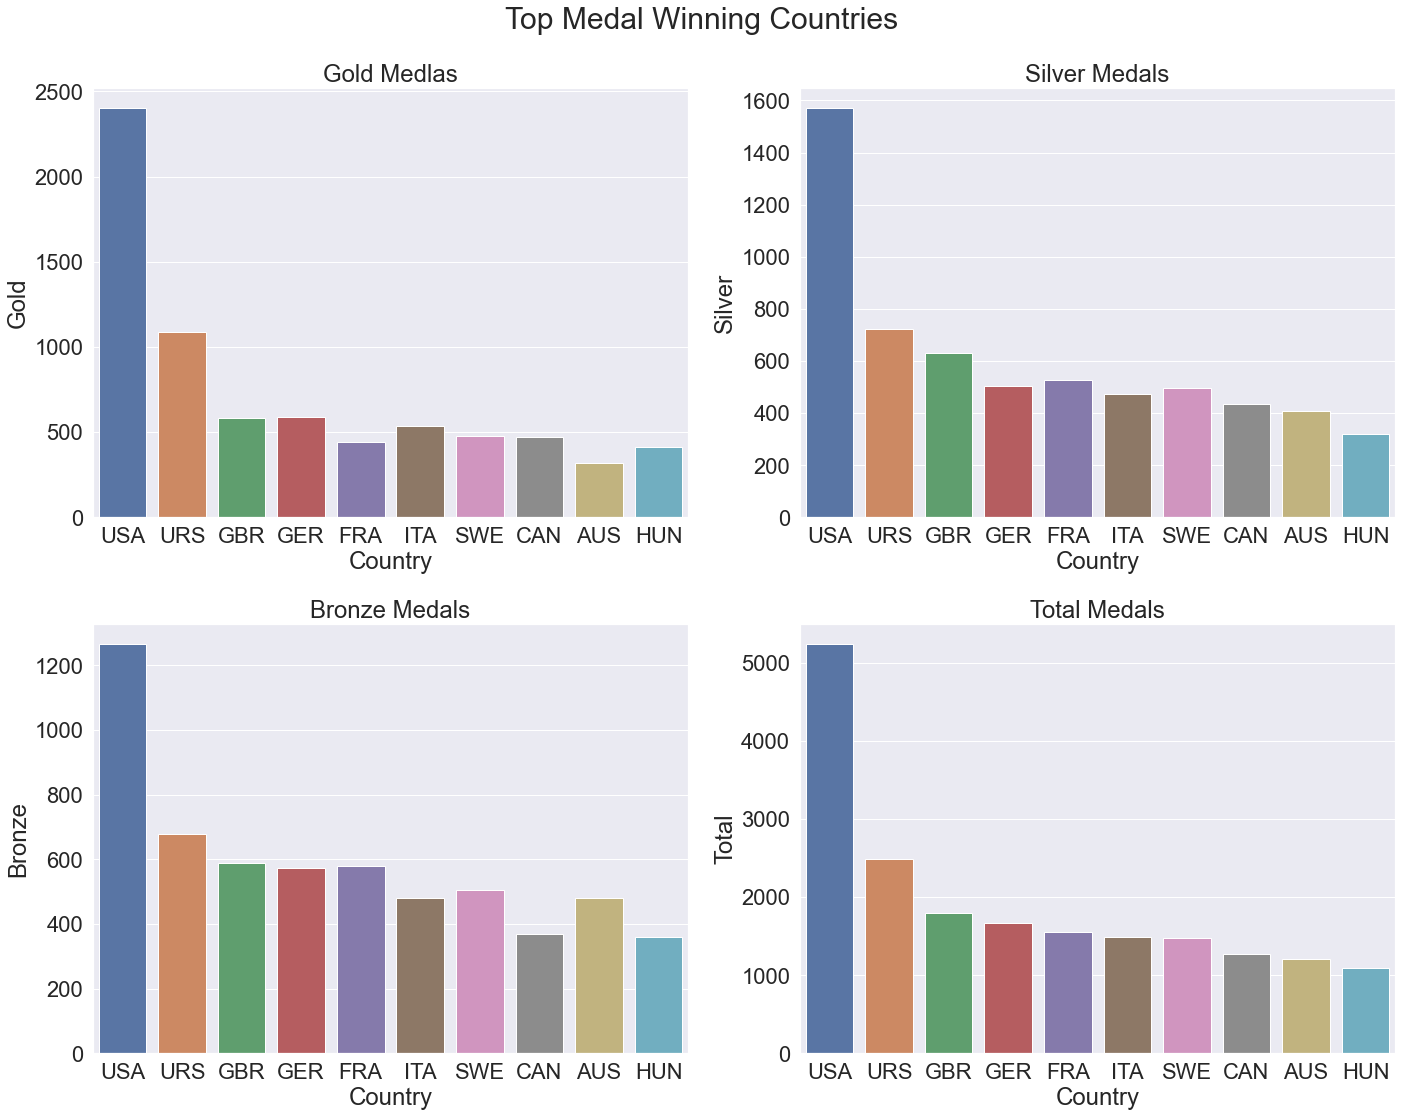

In [266]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 16), tight_layout=True, sharey=False)
fig.suptitle('Top Medal Winning Countries', fontsize=30)

gold = sns.barplot(ax=axes[0, 0], data=tot_medals.head(10), x="Country", y="Gold").set(title='Gold Medlas')
silver = sns.barplot(ax=axes[0, 1], data=tot_medals.head(10), x="Country", y="Silver").set(title='Silver Medals')
bronze = sns.barplot(ax=axes[1, 0], data=tot_medals.head(10), x="Country", y="Bronze").set(title='Bronze Medals')
total = sns.barplot(ax=axes[1, 1], data=tot_medals.head(10), x="Country", y="Total").set(title='Total Medals')

plt.show()

The United States (USA) has, by far, won the most Olympic medals, followed by the former Soviet Union (URS), and Great Britan (GBR).

## Western Country Dominance in Medal Rankings

##### Hypothesis 

The medal rankings are dominated by mostly Western European countries.  Several factors may contribute to this western dominance.  The tradition of holding Olympic games started in Athens, Greece, and for the former half of the 20th century were held almost exclusively in Europe. Without the availabilty of cheap and effective means of travel until the latter half of the 20th century, participation by countries outside that region was limited. Less wealthy countries would have less means to produce great athletes to compete, and the tradition of Olympic competition might fade the further each country diverges from Western culture.

In this section, we attempt to relate medal rankings among the top 50 countries to quantifiable characteristics of each country. These characteristics include: population, gross domestic product (GDP), number of games attended, and governing political regime. 

To assist in this analysis, the top 50 medal earning countries is merged with the associated characteristic information.

In [197]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Code,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Hungary,HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Austria,AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Greece,GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Greece,GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Greece,GRE,Men,100M Freestyle For Sailors,Silver


In [232]:
top_50 = olympics.groupby(["Country", "Medal"]).Medal.count().unstack()
top_50["Total"] = top_50.sum(axis=1)
top_50 = top_50[["Gold", "Silver", "Bronze", "Total"]].sort_values(by=["Total", "Gold", "Silver", "Bronze"], ascending=False)
top_50 = top_50.head(50)

In [233]:
top_50.head()

Medal,Gold,Silver,Bronze,Total
Country,,,,
United States,2402,1571,1265,5238
Soviet Union,1088,724,677,2489
United Kingdom,580,632,587,1799
Germany,589,504,572,1665
France,444,526,578,1548


In [234]:
top_50 = top_50.merge(dic, how='left', on='Country').set_index('Country')
top_50.rename(columns={"GDP per Capita": "GDP_per_Capita"}, inplace=True)
top_50.head()

,Gold,Silver,Bronze,Total,Code,Population,GDP_per_Capita
Country,,,,,,,
United States,2402,1571,1265,5238,USA,321418820.0,56115.718426
Soviet Union,1088,724,677,2489,NaN,NaN,NaN
United Kingdom,580,632,587,1799,GBR,65138232.0,43875.969614
Germany,589,504,572,1665,GER,81413145.0,41313.313995
France,444,526,578,1548,FRA,66808385.0,36205.568102


Calculating the number of each games each respective country has attended. This is approximated by number of years each country has won at least one medal.

In [235]:
year_attend = olympics.groupby(["Country", "Year", "Edition"]).Medal.any().unstack().fillna(False)
year_attend = year_attend.unstack(fill_value=False)

In [236]:
year_attend = year_attend.T.sum().sort_values(ascending=False)

In [237]:
top_50 = top_50.merge(year_attend.rename('Years_att'), how="left", on="Country")

In [238]:
top_50.drop(columns="Code", inplace=True)

In [239]:
top_50.head()

,Gold,Silver,Bronze,Total,Population,GDP_per_Capita,Years_att
Country,,,,,,,
United States,2402,1571,1265,5238,321418820.0,56115.718426,48
Soviet Union,1088,724,677,2489,NaN,NaN,18
United Kingdom,580,632,587,1799,65138232.0,43875.969614,42
Germany,589,504,572,1665,81413145.0,41313.313995,25
France,444,526,578,1548,66808385.0,36205.568102,47


In [240]:
top_50_ranked = top_50.rank(axis=0, ascending=False)

In [376]:
top_50_ranked

,Gold,Silver,Bronze,Total,Population,GDP_per_Capita,Years_att
Country,,,,,,,
United States,1.0,1.0,1.0,1.0,3.0,4.0,1.0
Soviet Union,2.0,2.0,2.0,2.0,NaN,NaN,28.0
United Kingdom,4.0,3.0,3.0,3.0,14.0,8.0,10.0
Germany,3.0,5.0,5.0,4.0,10.0,12.0,19.0
France,8.0,4.0,4.0,5.0,13.0,15.0,3.0
Italy,5.0,7.0,7.0,6.0,15.0,17.0,9.0
Sweden,6.0,6.0,6.0,7.0,32.0,6.0,3.0
Canada,7.0,8.0,12.0,8.0,23.0,10.0,3.0
Australia,13.0,9.0,8.0,9.0,24.0,3.0,14.0


## Statistical Analysis of Rankings Data

In [262]:
import scipy

### Number of Olympic Events Attended

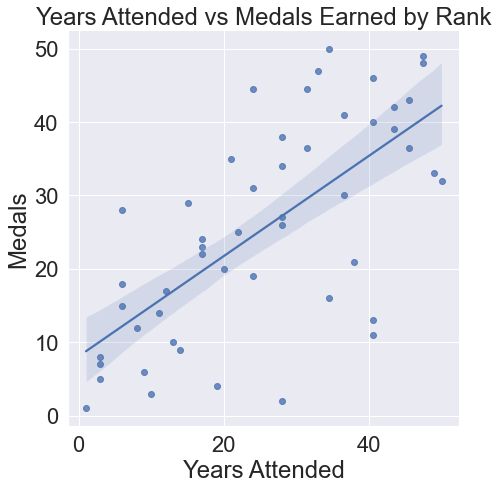

In [270]:
sns.lmplot(data=top_50_ranked, x="Years_att", y="Total", height=7, aspect=1).set(xlabel="Years Attended", ylabel='Medals', 
                                                             title='Years Attended vs Medals Earned by Rank')
plt.show()

In [244]:
scipy.stats.spearmanr(top_50_ranked.Total, b=top_50_ranked.Years_att)

SpearmanrResult(correlation=0.6818689415046658, pvalue=4.982151209468708e-08)

These two datasets are positively correlated with each other with a correlation coefficient of `0.682` and a p-value of `4.98e-08`. 

There can be several factors that affect the number of times a country attends an Olympic event. The more politically stable a country is, the longer it exists to be able to attend the games. Both East Germany and West Germany appear in the rankings, but stopped accruing medals because of the dissolution of those states during the Cold War. The United States and the United Kingdom appear high in the rankings because of longstanding political regimes allowing for continued participation.

### GDP Per Capita

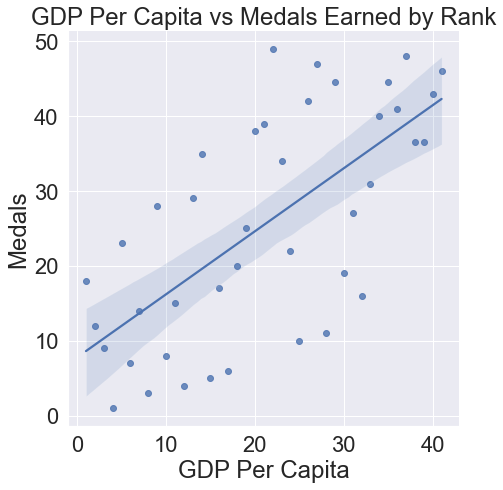

In [250]:
sns.lmplot(data=top_50_ranked, x="GDP_per_Capita", y="Total", height=7).set(xlabel="GDP Per Capita", ylabel='Medals', 
                                                             title='GDP Per Capita vs Medals Earned by Rank')
plt.show()

In [255]:
scipy.stats.spearmanr(top_50_ranked.Total, b=top_50_ranked.GDP_per_Capita, nan_policy='omit')

SpearmanrResult(correlation=0.6679153261689105, pvalue=1.8337033831048764e-06)

GDP Per Capita and Medals earned have a postive correlation coefficient of `0.668` and a p-value of `1.83e-06`. 

Richer countries earn more medals than poorer ones. 

-----------

### Population 

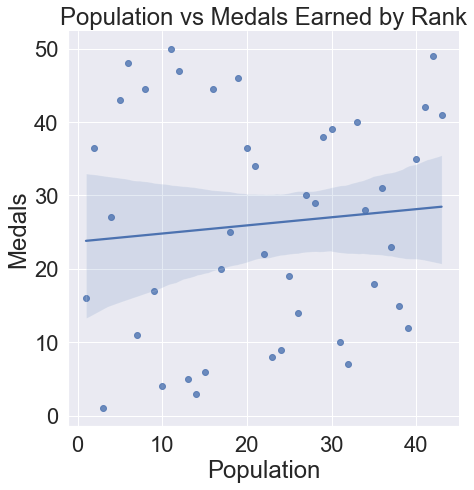

In [268]:
sns.lmplot(data=top_50_ranked, x="Population", y="Total", height=7).set(xlabel="Population", ylabel='Medals', 
                                                             title='Population vs Medals Earned by Rank')
plt.show()

In [260]:
scipy.stats.spearmanr(top_50_ranked.Total, b=top_50_ranked.Population, nan_policy='omit')

SpearmanrResult(correlation=0.09046288631091884, pvalue=0.5640004141819381)

The Spearman correlation coefficient between Population and Total Medals Won is `0.090`with a p-value of `0.564`.

There is no significant correlation between these two datasets, and the p-value suggests that any correlation is *not statistically significant*

### Medal Rankings Based on Gender and Event Type

Do different countries perform better based on the types of events? A country with an hot climate might perform better at the summer Olympics than a country with a colder climate. Similarly, does a specific gender from a country perform  better than the other?

In [271]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Code,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Hungary,HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Austria,AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Greece,GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Greece,GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Greece,GRE,Men,100M Freestyle For Sailors,Silver


In [320]:
gen_oly = olympics.groupby(["Country", "Gender"]).Medal.count().unstack(fill_value=0)
gen_oly = gen_oly.loc[top_50.index]

In [321]:
ed_oly = olympics.groupby(["Country", "Edition"]).Medal.count().unstack(fill_value=0)
ed_oly = ed_oly.loc[top_50.index]

In [345]:
olympic_stats = gen_oly.merge(ed_oly, how="left", on="Country").rank(ascending=False)
olympic_stats["Total"] = top_50_ranked.Total
olympic_stats.head()

,Men,Women,Summer,Winter,Total
Country,,,,,
United States,1.0,1.0,1.0,1.0,1.0
Soviet Union,2.0,2.0,2.0,4.0,2.0
United Kingdom,3.0,11.0,3.0,19.0,3.0
Germany,7.0,4.0,5.0,7.0,4.0
France,4.0,16.5,4.0,14.0,5.0


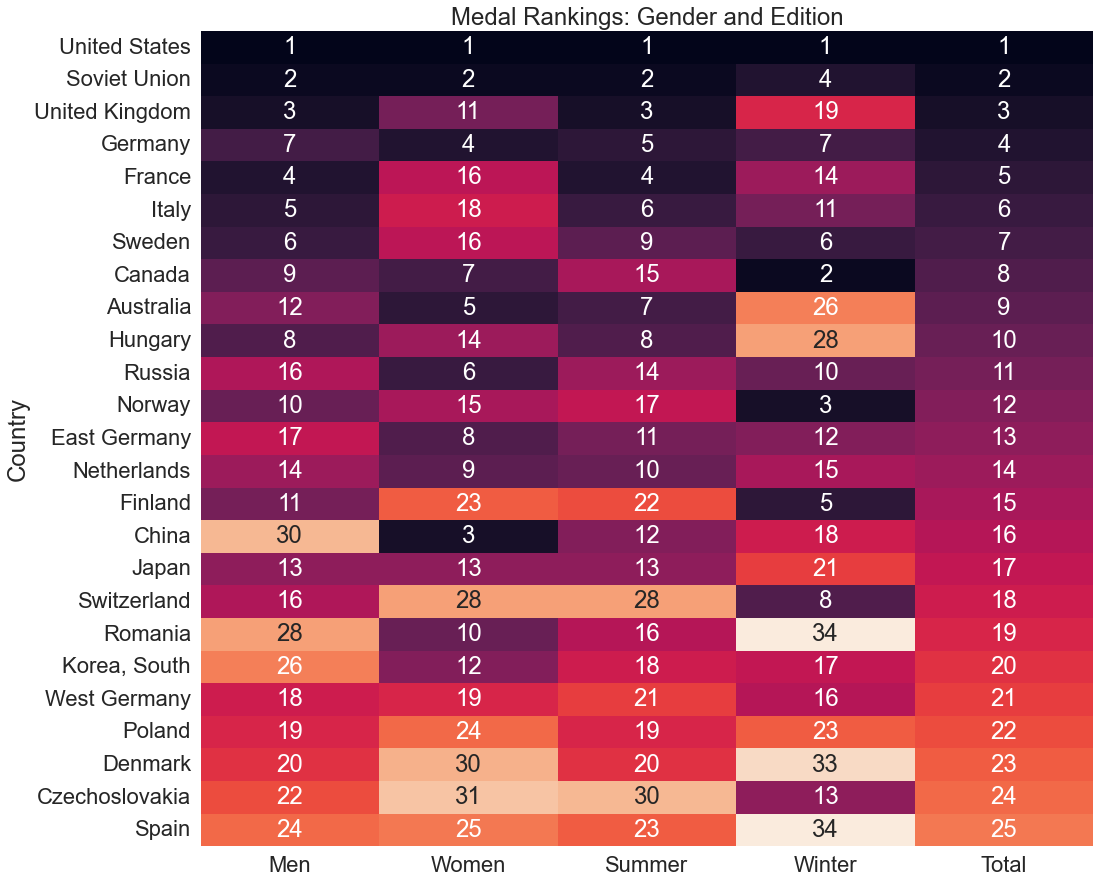

In [402]:
f = plt.figure(figsize=(16, 15))
sns.heatmap(data=olympic_stats.head(25), annot=True, cbar=False).set(title='Medal Rankings: Gender and Edition')
plt.show()

#### Summer and Winter Sport Bias

Canada, Norway, Finland, Switzerland, performed better in the Winter Olympics than the Summer Olympics. Logically, this makes sense. Countries with cold climates perform better in sports that require those conditions. Additionally, countries with cold climates will have customs and tradidions that promote and support participation in winter related sports.

This geographical bias can also be seen in hotter climate countries. The United Kingdom and Australia performed comparatively better in the Summer Olympics than the Winter Olympics. However, Romania and Hungary performed much better in the Summer olmypics than the Winter olympics despite having moderate to cold climates.

In [349]:
olympics_stats_full = olympic_stats.merge(dic, how="left", on="Country")

In [353]:
olympics_stats_full.rename(columns={"GDP per Capita": "GDP_per_Capita"}, inplace=True)

In [384]:
olympics_stats_full.GDP_per_Capita = olympics_stats_full.GDP_per_Capita.rank(ascending=False)

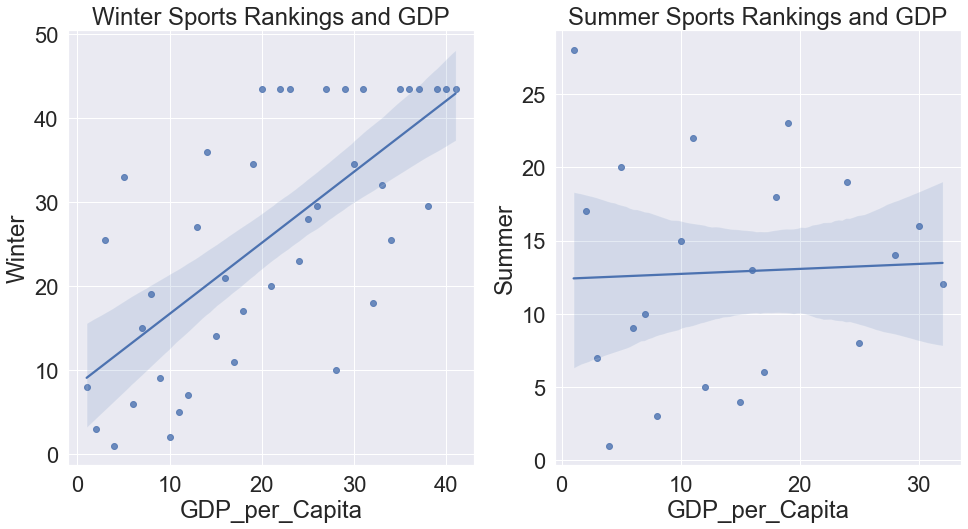

In [419]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
sns.regplot(ax=axes[0], data=olympics_stats_full, x="GDP_per_Capita", y="Winter").set(title="Winter Sports Rankings and GDP")
sns.regplot(ax=axes[1], data=olympics_stats_full.head(25), y= "Summer", x="GDP_per_Capita").set(title="Summer Sports Rankings and GDP")
plt.show()

In [386]:
scipy.stats.spearmanr(olympics_stats_full.Winter.head(25), b=olympics_stats_full.GDP_per_Capita.head(25), nan_policy='omit')

SpearmanrResult(correlation=0.44819749034847856, pvalue=0.04158187211974863)

In [388]:
scipy.stats.spearmanr(olympics_stats_full.Summer.head(25), b=olympics_stats_full.GDP_per_Capita.head(25), nan_policy='omit')

SpearmanrResult(correlation=0.05454545454545455, pvalue=0.814342822105269)

The relationship between GDP and medals earned per country starts to break down in the dataset of the top 25 countries. 

Country wealth has no relation to how well it performs in the games in the summer olmypics among the top 25 performing countries.

The winter olympics correlation to GDP in the top 25 performing countries is correlated at a value of `0.448` compared to the overall correlation of the top 50 countries at `0.667`.

When examining only a single variable, it is impossible to say whether and to what degree GDP, or country wealth, is affecting performance of athletes in Olympic games. Several hypothesies could be made on this relationship. Country wealth affects how available training methods are to the average citizen. A country with more wealth can afford to have a larger percentage of it's population spend time training as opposed to working. However, any further analysis is beyond the scope of this project.

__Gender and Medal Rankings__

China stands out as a huge outlier in medal rankings based on gender. The women's team ranks third in medal rankings to the men's 30th. There are many factors that could affect the Chinese sports teams. One of the most widely accepted theory suggests that China spent a disproportionate amount of investment on women's sports in order to bolster medal count. A Bloomberg article sugests "state-run sports bureaucracy spent decades investing in women’s sports, while the rest of the world — especially in the market-oriented West — lagged behind until recently"[2]. As overall representation of women in the Olmypics continues to grow, China's gender disparity may begin to shrink.

Women programs in Eastern European countries lag behind their male counterparts. France, Italy, Sweden, and the United Kingdom all underperformed in women events. Most theories about the disparity suggest that these countries lacked the means and infrastructure to produce great female athletes for the latter half of the 20th century when compared to economic giants like the US and China. As a result, their female programs suffered comparatively. 

### Does Traidition in Sporting Affect Rankings Among Events

Canada, Norway, and Finland winter athletes all outperform thier summer athletes. In this section we will break down the data further to rank each country on individual sports and see how regional traditions affect some sport rankings.

In [420]:
olympics.head()

,Edition,Year,City,Sport,Discipline,Athlete,Country,Code,Gender,Event,Medal
0,Summer,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",Hungary,HUN,Men,100M Freestyle,Gold
1,Summer,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",Austria,AUT,Men,100M Freestyle,Silver
2,Summer,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",Greece,GRE,Men,100M Freestyle For Sailors,Bronze
3,Summer,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",Greece,GRE,Men,100M Freestyle For Sailors,Gold
4,Summer,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",Greece,GRE,Men,100M Freestyle For Sailors,Silver


In [452]:
country_sport = olympics.groupby(["Country", "Sport"]).Medal.count().unstack(fill_value=0).rank(ascending=False)

In [453]:
country_sport.head()

Sport,Aquatics,Archery,Athletics,Badminton,Baseball,Basketball,Basque Pelota,Biathlon,Bobsleigh,Boxing,...,Softball,Table Tennis,Taekwondo,Tennis,Triathlon,Tug of War,Volleyball,Water Motorsports,Weightlifting,Wrestling
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,112.0,...,75.0,79.0,19.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Algeria,101.0,84.0,47.0,78.0,76.0,83.0,74.0,84.5,80.5,35.0,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,103.5,103.0
Argentina,41.0,84.0,53.5,78.0,76.0,11.5,74.0,84.5,80.5,9.0,...,75.0,79.0,28.0,12.0,79.0,76.5,17.0,74.0,45.5,103.0
Armenia,101.0,84.0,122.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,90.5,79.0,76.5,86.0,74.0,35.5,40.0
Australasia,30.5,84.0,88.0,78.0,76.0,83.0,74.0,84.5,80.5,70.5,...,75.0,79.0,89.5,31.0,79.0,76.5,86.0,74.0,103.5,103.0


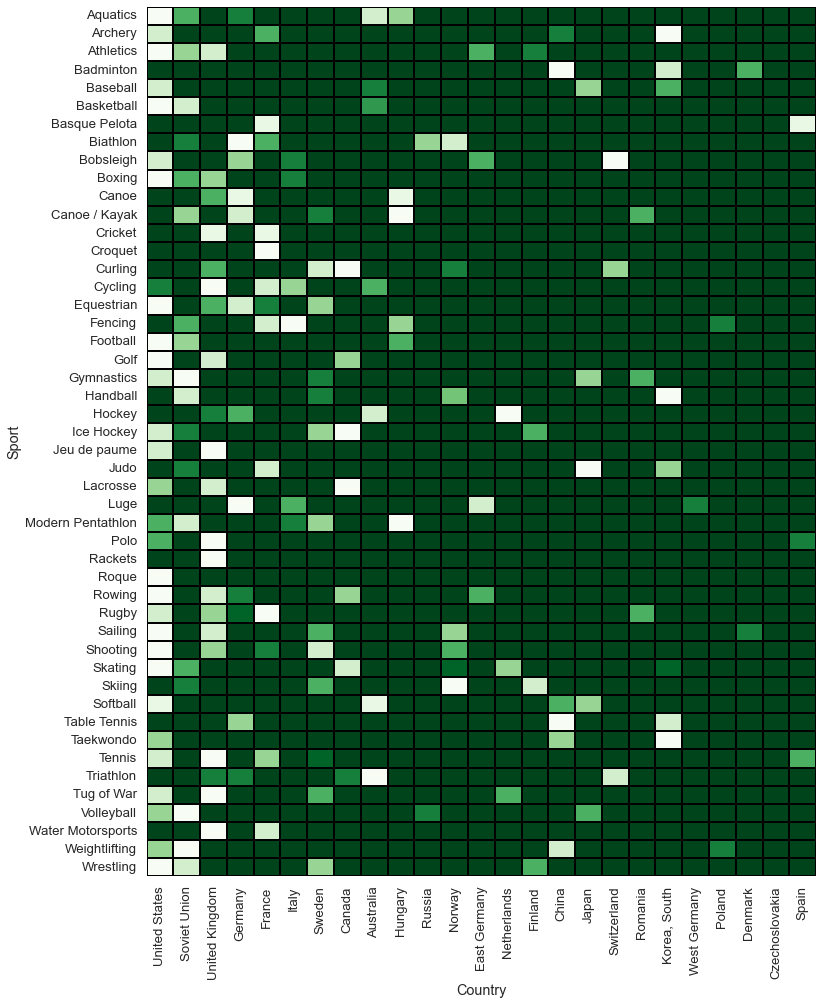

In [572]:
sns.set(font_scale=1.2)
plt.figure(figsize=(12, 16))
sns.heatmap(data=country_sport.loc[top_50.index].head(25).T, vmax=6, linewidths=2, linecolor='black', cmap='Greens', cbar=False)
plt.show()

#### The Traditional Bias

Regional traditions and affinities for sporting events can affect how well a country performs in the Olympics. At a glance some of these can be easily spotted using the sport heatmap. 

Canada has a long tradition of ice hockey and it transfers well into the medal rankings; they are the top performing country in this sport. Similarly they peform comparatively well in ice scating, lacrosse, and curling, all similar ice-related sports. 

South Korea excels in racquet sports like table tennis and badmintion, martial arts like Judo and Taekwondo.  Taekwondo is a Korean form of martial arts with plenty with plenty of history and tradition in Korean culture. Similarly, Japan performs well in Judo, a martial art originating in Japan. Several other corrleations in traditions and rankings can be seen. Hungary performs well in water sports, China in racquet sports, the United Kingdom in Polo and cycling, and the Netherlands in ice hockey.

While having a strong local tradition surrounding a sport does not guarantee success in the sport, aggregate rankings of these sports definitely show that some countries affinites in sporting transfer into medal rankings. 

## Sources:

Romania Climate: https://www.climatechangepost.com/romania/climate-change/#:~:text=Romania%20has%20a%20temperate%2Dcontinental,of%20the%20country%20(1).

China Women: https://www.bloomberg.com/opinion/articles/2021-07-27/as-china-s-olympic-women-soar-the-men-are-flailing?leadSource=uverify%20wall